In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
dataset = pd.read_excel("/content/case_study_ARIMA.xlsx")
print(dataset)

          SKU ISO_Week    Sales  Season
0    ProductA  2018-01      0.0  WINTER
1    ProductA  2018-02      0.0  WINTER
2    ProductA  2018-03      0.0  WINTER
3    ProductA  2018-04   6988.0  WINTER
4    ProductA  2018-04   6988.0  WINTER
..        ...      ...      ...     ...
145  ProductC  2018-48  12927.0  AUTUMN
146  ProductC  2018-49  11595.0  WINTER
147  ProductC  2018-50  10061.0  WINTER
148  ProductC  2018-51  10859.0  WINTER
149  ProductC  2018-52  13093.0  WINTER

[150 rows x 4 columns]


In [3]:
# drop Season
dataset = dataset.drop(['Season'], axis=1)
print(dataset)

          SKU ISO_Week    Sales
0    ProductA  2018-01      0.0
1    ProductA  2018-02      0.0
2    ProductA  2018-03      0.0
3    ProductA  2018-04   6988.0
4    ProductA  2018-04   6988.0
..        ...      ...      ...
145  ProductC  2018-48  12927.0
146  ProductC  2018-49  11595.0
147  ProductC  2018-50  10061.0
148  ProductC  2018-51  10859.0
149  ProductC  2018-52  13093.0

[150 rows x 3 columns]


In [4]:
# remove duplicate rows
dataset = dataset.drop_duplicates()
print(dataset)

          SKU ISO_Week    Sales
0    ProductA  2018-01      0.0
1    ProductA  2018-02      0.0
2    ProductA  2018-03      0.0
3    ProductA  2018-04   6988.0
5    ProductA  2018-05   6743.0
..        ...      ...      ...
145  ProductC  2018-48  12927.0
146  ProductC  2018-49  11595.0
147  ProductC  2018-50  10061.0
148  ProductC  2018-51  10859.0
149  ProductC  2018-52  13093.0

[146 rows x 3 columns]


In [5]:
# replace negative sales with 0
'''dataset.loc[dataset['Sales'] < 0, 'Sales'] = 0'''

"dataset.loc[dataset['Sales'] < 0, 'Sales'] = 0"

In [6]:
# filter data from 2018-01 to 2018-41
dataset = dataset[(dataset['ISO_Week'] >= '2018-01') &
                  (dataset['ISO_Week'] <= '2018-41')]
print(dataset)

          SKU ISO_Week    Sales
0    ProductA  2018-01      0.0
1    ProductA  2018-02      0.0
2    ProductA  2018-03      0.0
3    ProductA  2018-04   6988.0
5    ProductA  2018-05   6743.0
..        ...      ...      ...
134  ProductC  2018-37  11856.0
135  ProductC  2018-38   4185.0
136  ProductC  2018-39   4357.0
137  ProductC  2018-40   3730.0
138  ProductC  2018-41   3158.0

[113 rows x 3 columns]


In [7]:
array = dataset['SKU'].unique()
print(array)

['ProductA' 'ProductB' 'ProductC']


In [8]:
datasetA = dataset[dataset['SKU'] == 'ProductA']
datasetB = dataset[dataset['SKU'] == 'ProductB']
datasetC = dataset[dataset['SKU'] == 'ProductC']

In [9]:
for i in range(len(array)):
  dataseti = dataset[dataset['SKU'] == array[i]]
  dataseti.loc[:, 'Sales'] = dataseti['Sales'].fillna(dataseti['Sales'].median())
  # print(dataseti.isnull().sum())
  for i in range(len(dataseti)):
    if dataseti.iloc[i,2] <= 0:
      continue
    break
  dataseti = dataseti.iloc[i:,:]
  print(dataseti)

         SKU ISO_Week    Sales
3   ProductA  2018-04   6988.0
5   ProductA  2018-05   6743.0
6   ProductA  2018-06   4112.0
7   ProductA  2018-07   5732.0
8   ProductA  2018-08   6412.0
9   ProductA  2018-09   5559.0
10  ProductA  2018-10   5381.0
11  ProductA  2018-11  11709.0
12  ProductA  2018-12  10410.0
13  ProductA  2018-13  10211.0
14  ProductA  2018-14  10378.0
15  ProductA  2018-15  10012.0
17  ProductA  2018-16  10178.0
18  ProductA  2018-17  11316.0
19  ProductA  2018-18   6412.0
20  ProductA  2018-19  11384.0
21  ProductA  2018-20  10470.0
22  ProductA  2018-21   5471.0
23  ProductA  2018-22   4874.0
24  ProductA  2018-23   6746.0
25  ProductA  2018-24  10777.0
26  ProductA  2018-25   3730.0
27  ProductA  2018-26  11159.0
28  ProductA  2018-27   6568.0
29  ProductA  2018-28   4915.0
30  ProductA  2018-29   6412.0
31  ProductA  2018-30   6412.0
32  ProductA  2018-31   4579.0
33  ProductA  2018-32   6780.0
34  ProductA  2018-33   3648.0
35  ProductA  2018-34   3036.0
36  Prod

<ipython-input-9-4d6bb942a916>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataseti.loc[:, 'Sales'] = dataseti['Sales'].fillna(dataseti['Sales'].median())
<ipython-input-9-4d6bb942a916>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataseti.loc[:, 'Sales'] = dataseti['Sales'].fillna(dataseti['Sales'].median())
<ipython-input-9-4d6bb942a916>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

<Axes: xlabel='ISO_Week'>

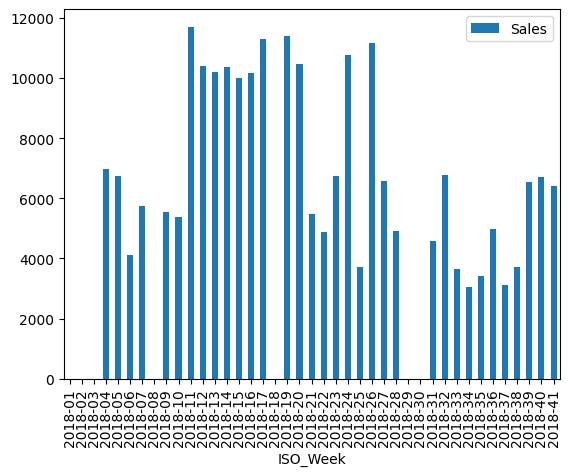

In [10]:
# ProductA
datasetA.plot.bar(x='ISO_Week', y='Sales')

<Axes: xlabel='ISO_Week'>

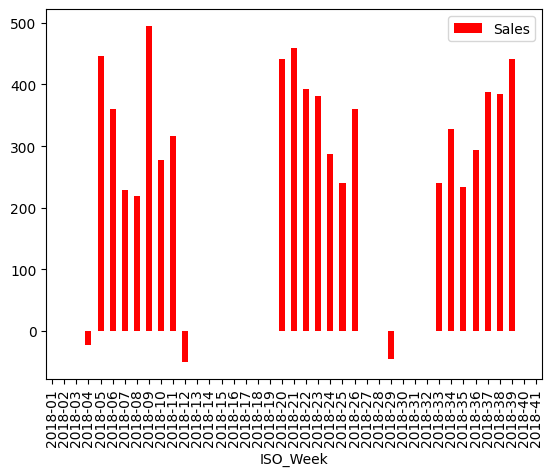

In [11]:
# ProductB
datasetB.plot.bar(x='ISO_Week', y='Sales',color= 'red')

<Axes: xlabel='ISO_Week'>

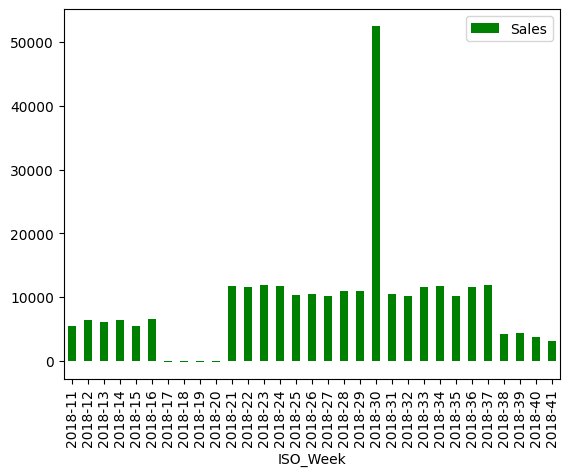

In [12]:
# ProductC
datasetC.plot.bar(x='ISO_Week', y='Sales',color = 'green')

In [13]:
datasetA = datasetA.set_index('ISO_Week')
datasetB = datasetB.set_index('ISO_Week')
datasetC = datasetC.set_index('ISO_Week')
print(datasetC)

               SKU    Sales
ISO_Week                   
2018-11   ProductC   5495.0
2018-12   ProductC   6330.0
2018-13   ProductC   6144.0
2018-14   ProductC   6383.0
2018-15   ProductC   5533.0
2018-16   ProductC   6619.0
2018-17   ProductC   -111.0
2018-18   ProductC   -149.0
2018-19   ProductC   -163.0
2018-20   ProductC   -119.0
2018-21   ProductC  11793.0
2018-22   ProductC  11583.0
2018-23   ProductC  11828.0
2018-24   ProductC  11672.0
2018-25   ProductC  10317.0
2018-26   ProductC  10468.0
2018-27   ProductC  10186.0
2018-28   ProductC  10892.0
2018-29   ProductC  10961.0
2018-30   ProductC  52524.0
2018-31   ProductC  10532.0
2018-32   ProductC  10168.0
2018-33   ProductC  11533.0
2018-34   ProductC  11663.0
2018-35   ProductC  10197.0
2018-36   ProductC  11549.0
2018-37   ProductC  11856.0
2018-38   ProductC   4185.0
2018-39   ProductC   4357.0
2018-40   ProductC   3730.0
2018-41   ProductC   3158.0


In [14]:
datasetA.drop(['SKU'], axis=1, inplace=True)
datasetB.drop(['SKU'], axis=1, inplace=True)
datasetC.drop(['SKU'], axis=1, inplace=True)

In [15]:
 # ARIMA model for ProductA
modelA = ARIMA(datasetA, order=(41, 1, 1))
model_fitA = modelA.fit()
print(model_fitA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   41
Model:                ARIMA(41, 1, 1)   Log Likelihood                -321.563
Date:                Thu, 21 Mar 2024   AIC                            729.125
Time:                        16:16:33   BIC                            801.747
Sample:                             0   HQIC                           755.383
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2724   1060.537      0.000      1.000   -2078.342    2078.887
ar.L2          0.8065   5875.156      0.000      1.000   -1.15e+04    1.15e+04
ar.L3          0.0947   1.11e+04   8.52e-06      1.0

In [16]:
# make prediction for 2018-42 to 2018-52
yhatA = model_fitA.predict(42, 52, typ='levels')
print(yhatA)

42     4476.248532
43    11769.369354
44     9304.208563
45    10373.203130
46    11351.381106
47    12632.059029
48     9094.739613
49     9373.714309
50    14013.635264
51    14010.274464
52    14075.200821
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [17]:
# ARIMA model for ProductB

modelB = ARIMA(datasetB, order=(41, 1, 1))
model_fitB = modelB.fit()
print(model_fitB.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   41
Model:                ARIMA(41, 1, 1)   Log Likelihood                -218.764
Date:                Thu, 21 Mar 2024   AIC                            523.527
Time:                        16:16:55   BIC                            596.149
Sample:                             0   HQIC                           549.785
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8163     97.602     -0.019      0.985    -193.113     189.481
ar.L2         -1.6077     34.686     -0.046      0.963     -69.591      66.375
ar.L3         -0.8684     47.679     -0.018      0.9

In [18]:
# make prediction for 2018-42 to 2018-52
yhatB = model_fitB.predict(42, 53, typ='levels')
print(yhatB)

42     69.275613
43   -143.844735
44     68.598116
45    -93.660335
46     70.132977
47    205.713889
48    478.571132
49    328.985331
50    481.202126
51    115.211002
52    346.365189
53    378.061866
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [19]:
# ARIMA model for ProductC

modelC = ARIMA(datasetC, order=(31, 1, 1))
model_fitC = modelC.fit()
print(model_fitC.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   31
Model:                ARIMA(31, 1, 1)   Log Likelihood                -315.565
Date:                Thu, 21 Mar 2024   AIC                            697.131
Time:                        16:16:57   BIC                            743.370
Sample:                             0   HQIC                           711.923
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3721    198.562     -0.002      0.999    -389.546     388.802
ar.L2         -0.3214    494.186     -0.001      0.999    -968.908     968.265
ar.L3         -0.2163    496.856     -0.000      1.0

In [20]:
# make prediction for 2018-42 to 2018-52
yhatC = model_fitC.predict(42, 52, typ='levels')
print(yhatC)

42    14351.976543
43    13344.076323
44    13715.902172
45    11639.203847
46    10952.709596
47    12805.287720
48    11248.667891
49    11057.858468
50     9686.820059
51     9825.991612
52     8364.407867
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
